In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline

In [2]:
# reading the data
cultivation_data = pd.read_csv('../datasets/data/agriculture_india.csv', encoding = "ISO-8859-1")

# checking the shape of the data
print(cultivation_data.shape)

(49, 6)


In [3]:
cultivation_data.head()

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72


In [4]:
cultivation_data['Per Hectare Cost Price'] = cultivation_data['Cost of Production (`/Quintal) C2'] * cultivation_data['Yield (Quintal/ Hectare) ']
cultivation_data['Cost of cultivation per hectare'] = cultivation_data['Cost of Cultivation (`/Hectare) A2+FL'] + cultivation_data['Cost of Cultivation (`/Hectare) C2']
cultivation_data['Yield in Kg per hectare'] = cultivation_data['Yield (Quintal/ Hectare) '] * 100
print(cultivation_data.head())

    Crop           State  Cost of Cultivation (`/Hectare) A2+FL  \
0  ARHAR   Uttar Pradesh                                9794.05   
1  ARHAR       Karnataka                               10593.15   
2  ARHAR         Gujarat                               13468.82   
3  ARHAR  Andhra Pradesh                               17051.66   
4  ARHAR     Maharashtra                               17130.55   

   Cost of Cultivation (`/Hectare) C2  Cost of Production (`/Quintal) C2  \
0                            23076.74                            1941.55   
1                            16528.68                            2172.46   
2                            19551.90                            1898.30   
3                            24171.65                            3670.54   
4                            25270.26                            2775.80   

   Yield (Quintal/ Hectare)   Per Hectare Cost Price  \
0                       9.83              19085.4365   
1                       7.47

In [5]:
print(cultivation_data.T.head())

                                                  0          1        2   \
Crop                                           ARHAR      ARHAR    ARHAR   
State                                  Uttar Pradesh  Karnataka  Gujarat   
Cost of Cultivation (`/Hectare) A2+FL        9794.05    10593.1  13468.8   
Cost of Cultivation (`/Hectare) C2           23076.7    16528.7  19551.9   
Cost of Production (`/Quintal) C2            1941.55    2172.46   1898.3   

                                                   3            4   \
Crop                                            ARHAR        ARHAR   
State                                  Andhra Pradesh  Maharashtra   
Cost of Cultivation (`/Hectare) A2+FL         17051.7      17130.5   
Cost of Cultivation (`/Hectare) C2            24171.7      25270.3   
Cost of Production (`/Quintal) C2             3670.54       2775.8   

                                                5        6               7   \
Crop                                       

In [6]:
print(cultivation_data.Crop.value_counts())

MOONG                   5
MAIZE                   5
COTTON                  5
GRAM                    5
RAPESEED AND MUSTARD    5
SUGARCANE               5
ARHAR                   5
GROUNDNUT               5
PADDY                   5
WHEAT                   4
Name: Crop, dtype: int64


Index(['Crop', 'State', 'Cost of Cultivation (`/Hectare) A2+FL',
       'Cost of Cultivation (`/Hectare) C2',
       'Cost of Production (`/Quintal) C2', 'Yield (Quintal/ Hectare) ',
       'Per Hectare Cost Price', 'Cost of cultivation per hectare',
       'Yield in Kg per hectare'],
      dtype='object')


Text(0, 0.5, 'Yield (Quintal/ Hectare)')

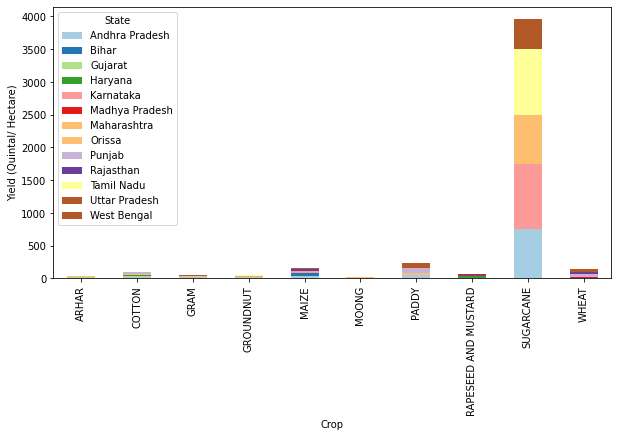

In [17]:
# checking columns of dataframe
print(cultivation_data.columns)
# creating list of specific columns from dataframe
columns = ['Crop','State','Yield (Quintal/ Hectare) ']
# creating subset of dataframe using list of specific columns
new_data = cultivation_data[columns]
# pivoting the dataframe
table = new_data.pivot('Crop','State','Yield (Quintal/ Hectare) ')
# fill Nan values with zero
table = table.fillna(0)
# plot (stacked bar plots) pivoted dataframe
table.plot(kind='bar',stacked=True,colormap='Paired')
plt.rcParams['figure.figsize'] = (10, 10)
# setting Y label
plt.ylabel('Yield (Quintal/ Hectare)')

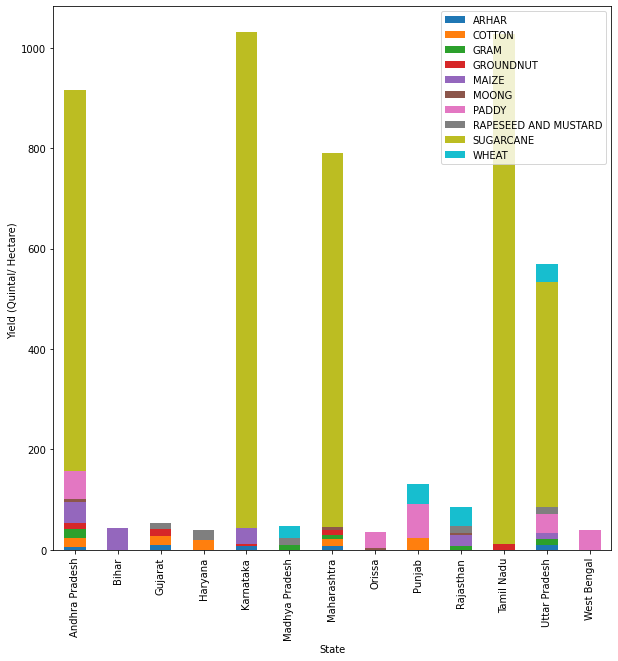

In [18]:
# plotting transposed dataframe
table.T.plot(kind='bar',stacked=True)
plt.ylabel('Yield (Quintal/ Hectare) ')
# setting legend location to best
plt.rcParams['figure.figsize'] = (10, 10)
plt.legend(loc='best')

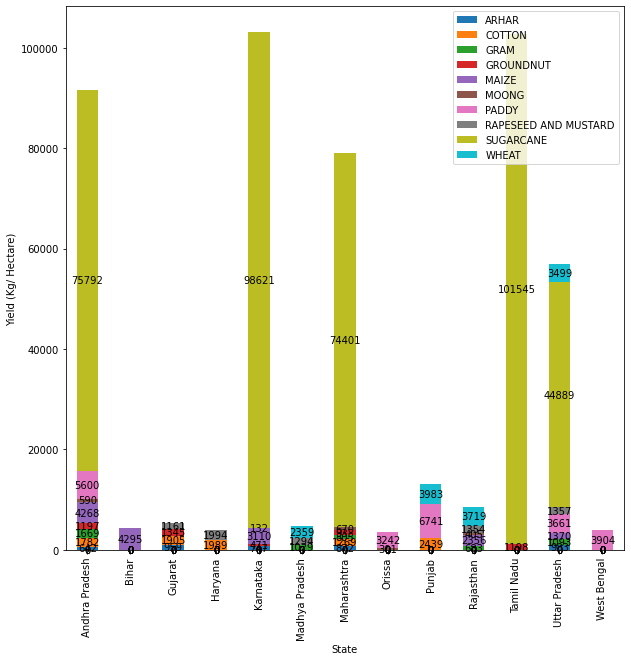

In [19]:
columns = ['Crop','State','Yield in Kg per hectare']
new_data = cultivation_data[columns]
table = new_data.pivot('Crop','State','Yield in Kg per hectare')
table = table.fillna(0)
ax = table.T.plot(kind='bar',stacked=True)
labels = []
for j in table.T.columns:
    for i in table.T.index:
        label = round((int(table.T.loc[i][j])),1)
        labels.append(label)

patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2.,y + height/2.,label, ha='center',va='center')

plt.ylabel('Yield (Kg/ Hectare)')
plt.rcParams['figure.figsize'] = (10, 10)

plt.legend(loc='best')

Text(0, 0.5, 'Per Hectare Cost Price')

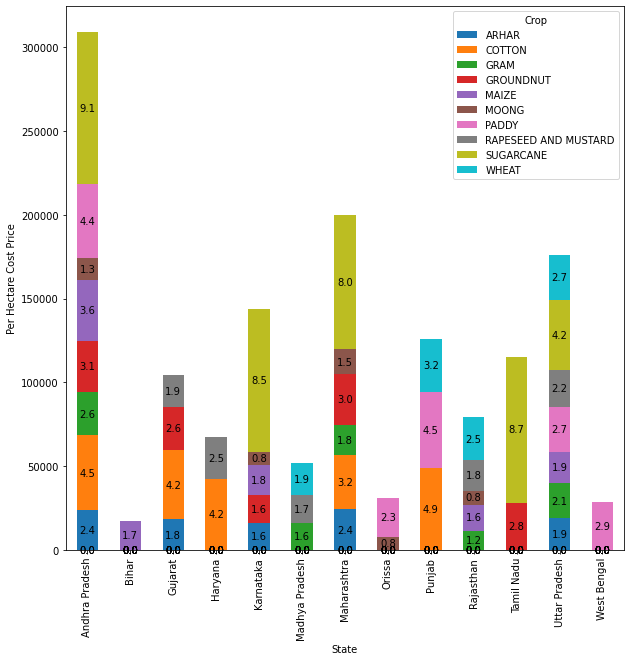

In [20]:
columns = ['Crop','State','Per Hectare Cost Price']
new_data = cultivation_data[columns]
table = new_data.pivot('Crop','State','Per Hectare Cost Price')
table = table.fillna(0)
ax = table.T.plot(kind='bar',stacked=True)
labels = []
for j in table.T.columns:
    for i in table.T.index:
        label = round((int(table.T.loc[i][j])/10000),1)
        labels.append(label)

patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2.,y + height/2.,label, ha='center',va='center')
plt.rcParams['figure.figsize'] = (10, 10)
plt.ylabel('Per Hectare Cost Price')

Text(0, 0.5, 'Cost of cultivation per hectare')

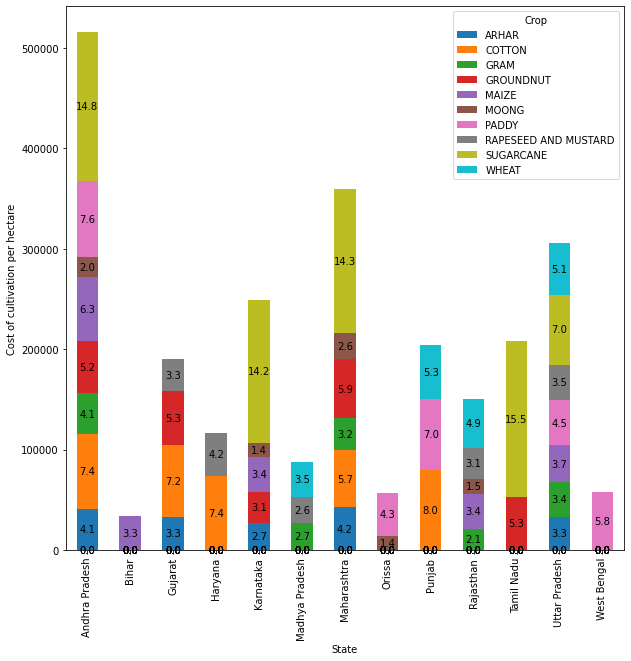

In [21]:
columns = ['Crop','State','Cost of cultivation per hectare']
new_data = cultivation_data[columns]
table = new_data.pivot('Crop','State','Cost of cultivation per hectare')
table = table.fillna(0)
ax = table.T.plot(kind='bar',stacked=True)

labels = []
for j in table.T.columns:
    for i in table.T.index:
        label = round((int(table.T.loc[i][j])/10000),1)
        labels.append(label)

patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    height = rect.get_height()
    ax.text(x + width/2.,y + height/2.,label,ha='center', va='center')
plt.rcParams['figure.figsize'] = (10, 10)
plt.ylabel('Cost of cultivation per hectare')